## Непараметрические критерии

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Question 4

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49,58,75,110,112,132,151,276,281,362∗

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H0:medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [3]:
data = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])
m0 = 200

In [4]:
result = stats.wilcoxon(data - m0)
result

WilcoxonResult(statistic=17.0, pvalue=0.28450269791120752)

In [5]:
print "answer = %.4f" %  result.pvalue

answer = 0.2845


### Question 5

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

    22,22,15,13,19,19,18,20,21,13,13,15,

и в 9 лесах, где идёт вырубка:

    17,18,18,15,12,4,14,15,10.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [6]:
data1 = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
data2 = np.array([17,18,18,15,12,4,14,15,10])

In [7]:
print '95%% confidence interval for the mean: [%f, %f]' % zconfint(data1)
print '95%% confidence interval for the mean: [%f, %f]' % zconfint(data2)

95% confidence interval for the mean: [15.503261, 19.496739]
95% confidence interval for the mean: [10.726721, 16.606613]


In [8]:
result = stats.mannwhitneyu(data1, data2, alternative='greater')
result

MannwhitneyuResult(statistic=81.0, pvalue=0.029004992720873729)

In [9]:
print "answer = %.4f" % result.pvalue

answer = 0.0290


### Question 6

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

* установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
* сделайте по 1000 псевдовыборок из каждой выборки.

In [10]:
data = pd.read_csv('challenger.txt', sep='\t')
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [11]:
data_without_incident = data[data.Incident == 0].Temperature.values
data_without_incident

array([ 18.9,  20.6,  20. ,  19.4,  22.2,  22.8,  21.1,  25.6,  19.4,
        19.4,  23.9,  21.1,  27.2,  24.4,  26.1,  24.4])

In [12]:
data_with_incident = data[data.Incident == 1].Temperature.values
data_with_incident

array([ 21.1,  13.9,  17.2,  21.1,  11.7,  23.9,  14.4])

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [14]:
np.random.seed(0)

samples_without_incident = get_bootstrap_samples(data_without_incident, 1000)
samples_with_incident = get_bootstrap_samples(data_with_incident, 1000)

In [15]:
with_incident_mean_scores = np.array(map(np.mean, samples_with_incident))
without_incident_mean_scores = np.array(map(np.mean, samples_without_incident))

delta_mean_scores = map(lambda x: x[1] - x[0], zip(with_incident_mean_scores, without_incident_mean_scores))
delta_mean_scores = np.array(delta_mean_scores)

In [16]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [17]:
print "with incident: ", stat_intervals(with_incident_mean_scores, 0.05)
print "without incident: ", stat_intervals(without_incident_mean_scores, 0.05) 

with incident:  [ 14.5125      20.71607143]
without incident:  [ 21.06875   23.575625]


In [18]:
print "95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05)

95% confidence interval for the difference between means [ 1.42299107  7.93861607]


### Question 7

На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

* установите random seed = 0;
* возьмите 10000 перестановок.

In [19]:
data = pd.read_csv('challenger.txt', sep='\t')
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [20]:
data_without_incident = data[data.Incident == 0].Temperature.values
data_without_incident

array([ 18.9,  20.6,  20. ,  19.4,  22.2,  22.8,  21.1,  25.6,  19.4,
        19.4,  23.9,  21.1,  27.2,  24.4,  26.1,  24.4])

In [21]:
data_with_incident = data[data.Incident == 1].Temperature.values
data_with_incident

array([ 21.1,  13.9,  17.2,  21.1,  11.7,  23.9,  14.4])

In [22]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [23]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [24]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

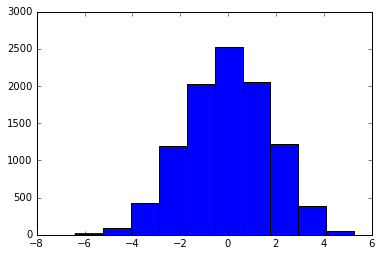

In [28]:
pylab.hist(permutation_zero_dist_ind(data_with_incident, data_without_incident, max_combinations = 10000))
pylab.show()

In [26]:
def permutation_test(sample1, sample2, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [27]:
np.random.seed(0)
print "p-value: %f" % permutation_test(data_without_incident, data_with_incident, max_permutations = 10000)

p-value: 0.007000
